# Exercise 1

In this exercise we are going to learn in practice how Polynomial Linear Regression works.

Before running the following code blocks, please first run

```bash
pip install numpy
pip install matplotlib
pip install -U scikit-learn
```

In [1]:
import numpy as np

np.random.seed(42)

## Plotting Utils

Plotting is quite important in machine learning which helps us quickly get intuition from enormous data points and gain intuition. Plus they also do good to your illustration. Matplotlib is one of the most commonly used plotting libraries in python. 

Seaborn, Nineplot and Plotly are also powerful and it's important to master at least one of them. 

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import rc

## Creating Toy Data

We have prepared the toy data for you. But do not just skip this part! Skim through it and think:

- Why are we declaring a known function and add random noise to samples from it? What are the practical counterparts of them?

- Why do we choose Gaussian distribution as the noise instead of the other distributions?

In [3]:
import math

# sin
def sin(x):
    y = np.sin(2 * math.pi * x)
    return y

In [4]:
def create_toy_data(func, interval, sample_num, noise = 0.0, add_outlier = False, outlier_ratio = 0.001):
    """
    generate data with the given function
    
    input:
       - func: the input function
       - interval: the range of values of x, a tuple (start, end)
       - sample_num: number of samples
       - noise: the standard deviation of Gaussian noise
       - add_outlier: whether to generate outliers
       - outlier_ratio: proportion of outliers
       
    output:
       - X: samples, shape = [n_samples,1]
       - y: labels, shape = [n_samples,1]
    """
    
    X = np.random.rand(sample_num,1) * (interval[1]-interval[0]) + interval[0]
    y = func(X)

    # add Gaussian noise
    epsilon = np.random.normal(0, noise, (sample_num,1))
    y = y + epsilon
    
    # add outlier
    if add_outlier:
        outlier_num = int(sample_num * outlier_ratio)
        if outlier_num != 0:
            outlier_idx = np.random.randint(sample_num, size = [outlier_num,1])
            y[outlier_idx] = y[outlier_idx] * 5
            
    return X, y

The black line in the following figure stands for the underlying data distribution, circles for trainig data and triangles for test data.

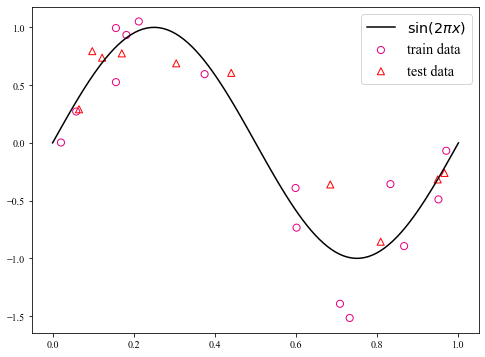

In [5]:
func = sin
interval = (0,1)
train_num = 15
test_num = 10
noise = 0.2
X_train, y_train = create_toy_data(func=func, interval=interval, sample_num=train_num, noise=noise)
X_test, y_test = create_toy_data(func=func, interval=interval, sample_num=test_num, noise=noise)

X_underlying = np.linspace(interval[0],interval[1],num=100)
y_underlying = sin(X_underlying)

# plot
"""_summary_ draw the plot of the underlying function and the training and test data"""
rc('font', family='times new roman')
plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.plot(X_underlying, y_underlying, c='#000000', label=r"$\sin(2\pi x)$")
plt.scatter(X_train, y_train, facecolor="none", edgecolor='#e4007f', s=50, label="train data")
plt.scatter(X_test, y_test, facecolor="none", edgecolor="r", marker = '^', s=50, label="test data")
plt.legend(fontsize='x-large')
plt.show()

## Using Sklearn for Polynomial Linear Regression

Sklearn is a commonly used machine learning library. Now we are going to learn the basics of it and fo some exploratory experiments.

### Polynomial Features

Sklearn has implemented for us how we change a scalar feature to a polynomial vector feature.

**Try predicting the output of the following cell and check your answer.**

In [6]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)

print(poly.fit_transform(np.array([[1],[2]])))

# We are using the PolynomialFeatures class from sklearn.preprocessing to generate the polynomial features.
# We have set the polynomial degree to 3. So what do you think the output of the above code will be?

[[1. 1. 1. 1.]
 [1. 2. 4. 8.]]


Possible pitfall: an $x^0$ term is always included in the feature, which is called bias. So the dimension of transformed feature is 4.

### Fitting the data above

Now let's dive into the sinusoidal data fitting task above.

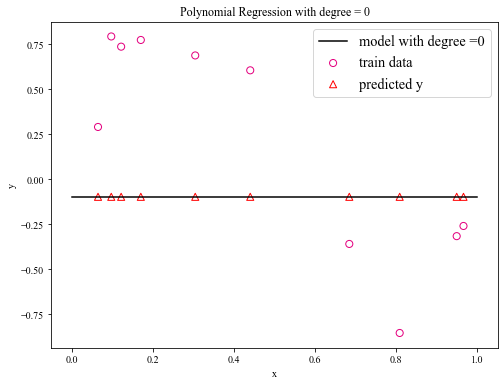

In [7]:
def visualize_poly_model(model, degree, X_test, y_test, y_pre):
    # plot
    X_underlying_model = np.linspace(interval[0],interval[1],num=100)
    y_underlying_model = model.predict(poly.fit_transform(X_underlying_model.reshape(-1,1)))
        
    plt.plot(X_underlying_model, y_underlying_model, c='#000000', label="model with degree =" + str(degree))
    rc('font', family='times new roman')
    plt.rcParams['figure.figsize'] = (8.0, 6.0)
    plt.scatter(X_test, y_test, facecolor="none", edgecolor='#e4007f', s=50, label="train data")
    plt.scatter(X_test, y_pre, facecolor="none", edgecolor="r", marker = '^', s=50, label="predicted y")
    plt.title("Polynomial Regression with degree = " + str(degree))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(fontsize='x-large')
    plt.show()


from sklearn.linear_model import LinearRegression

degree = 0

poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pre = model.predict(poly.fit_transform(X_test))
visualize_poly_model(model, degree, X_test, y_test, y_pre)

Now we want to figure out the following questions:

- How do we quantitate the quality of the fitted model? Try different degrees. Can you write a function to quantitatively figure out which degree is the optimal in the setting above? **Concretely, we need to manually write down the MSE loss function and analysis(or plotting) how test loss goes up as degree goes up?**

- What do you observe when degree goes large? What is this phenomenon called?

Say now I want you to fix the degree to 10 and still get a model rather close to the best model you get above.

- Can you try to implement two different methods, namely adding datapoints and regularization? **Try fitting new models using the two basic techniques.**

Some necessary materials:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge